In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import time
def generate_matrix(df,color):
    data = []
    for i, row in df.iterrows():
        sublist = []
        row = row.to_dict()
        row = { k:v for k,v in row.items() if v >0}
        if len(row) > 0:
            item ,_ =  row.popitem()
            sublist.append(item)
            sublist.append(i)
            sublist.append(color)

            data.append(sublist)


    op = pd.DataFrame(data, columns=['gene','time','color'])
    return op
    
# df0 = pd.read_excel(r"Pinores_7yim.xlsx" , index_col='Time (ns)',sheet_name=1)
df1 = pd.read_excel(r"merged_hbond_data_cetirizine.xlsx" , index_col='Time (ns)',sheet_name=0)
df2 = pd.read_excel(r"merged_hbond_data_4048.xlsx" , index_col='Time (ns)',sheet_name=0)


# df0 = generate_matrix(df0,'red')
df1 = generate_matrix(df1,'black')
df2 = generate_matrix(df2,'red')

main_df = pd.concat([df1,df2])

# ,df1,df2

main_df = main_df.groupby(['gene','color']).agg(pd.Series.tolist)

main_df.reset_index(inplace=True)

offsets = list(main_df.index)
plt.rc('font',family='Times New Roman')
plt.rcParams.update({'font.size': 30})

main_df['gene_numerical'] = pd.factorize(main_df['gene'])[0]
# main_df.to_excel('dataframe_new.xlsx')

temp_df = main_df[['gene','gene_numerical']].groupby('gene').agg(pd.Series.tolist)

def get_new_factor(f):    
    newli = []
    l = len(f)
    a_li = [x*1 for x in range(1,len(f))]
    ai = 0
    for index, val in enumerate(f):
        if index == 0:
            newli.append(val)
        else:
            newli.append(val + ( a_li[ai] / l))
            ai += 1
    return newli   

temp_df["new_factor"] = temp_df["gene_numerical"].apply(get_new_factor)
temp_df = temp_df.explode('new_factor')


main_df.reset_index(inplace = True)
temp_df.reset_index(inplace = True)

main_df['new_factor'] = temp_df['new_factor']
# main_df = main_df.assign(new_factor=temp_df['new_factor'])

print(main_df['new_factor'])

new_values_new_factor = {1: 0.25, 3: 1.25, 5: 2.25}

# Replace the values using .loc
for pos, value in new_values_new_factor.items():
    main_df.iloc[pos, main_df.columns.get_loc('new_factor')] = value



0       0
1     0.5
2       1
3     1.5
4       2
5     2.5
6       3
7       4
8       5
9       6
10      7
Name: new_factor, dtype: object


findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: 

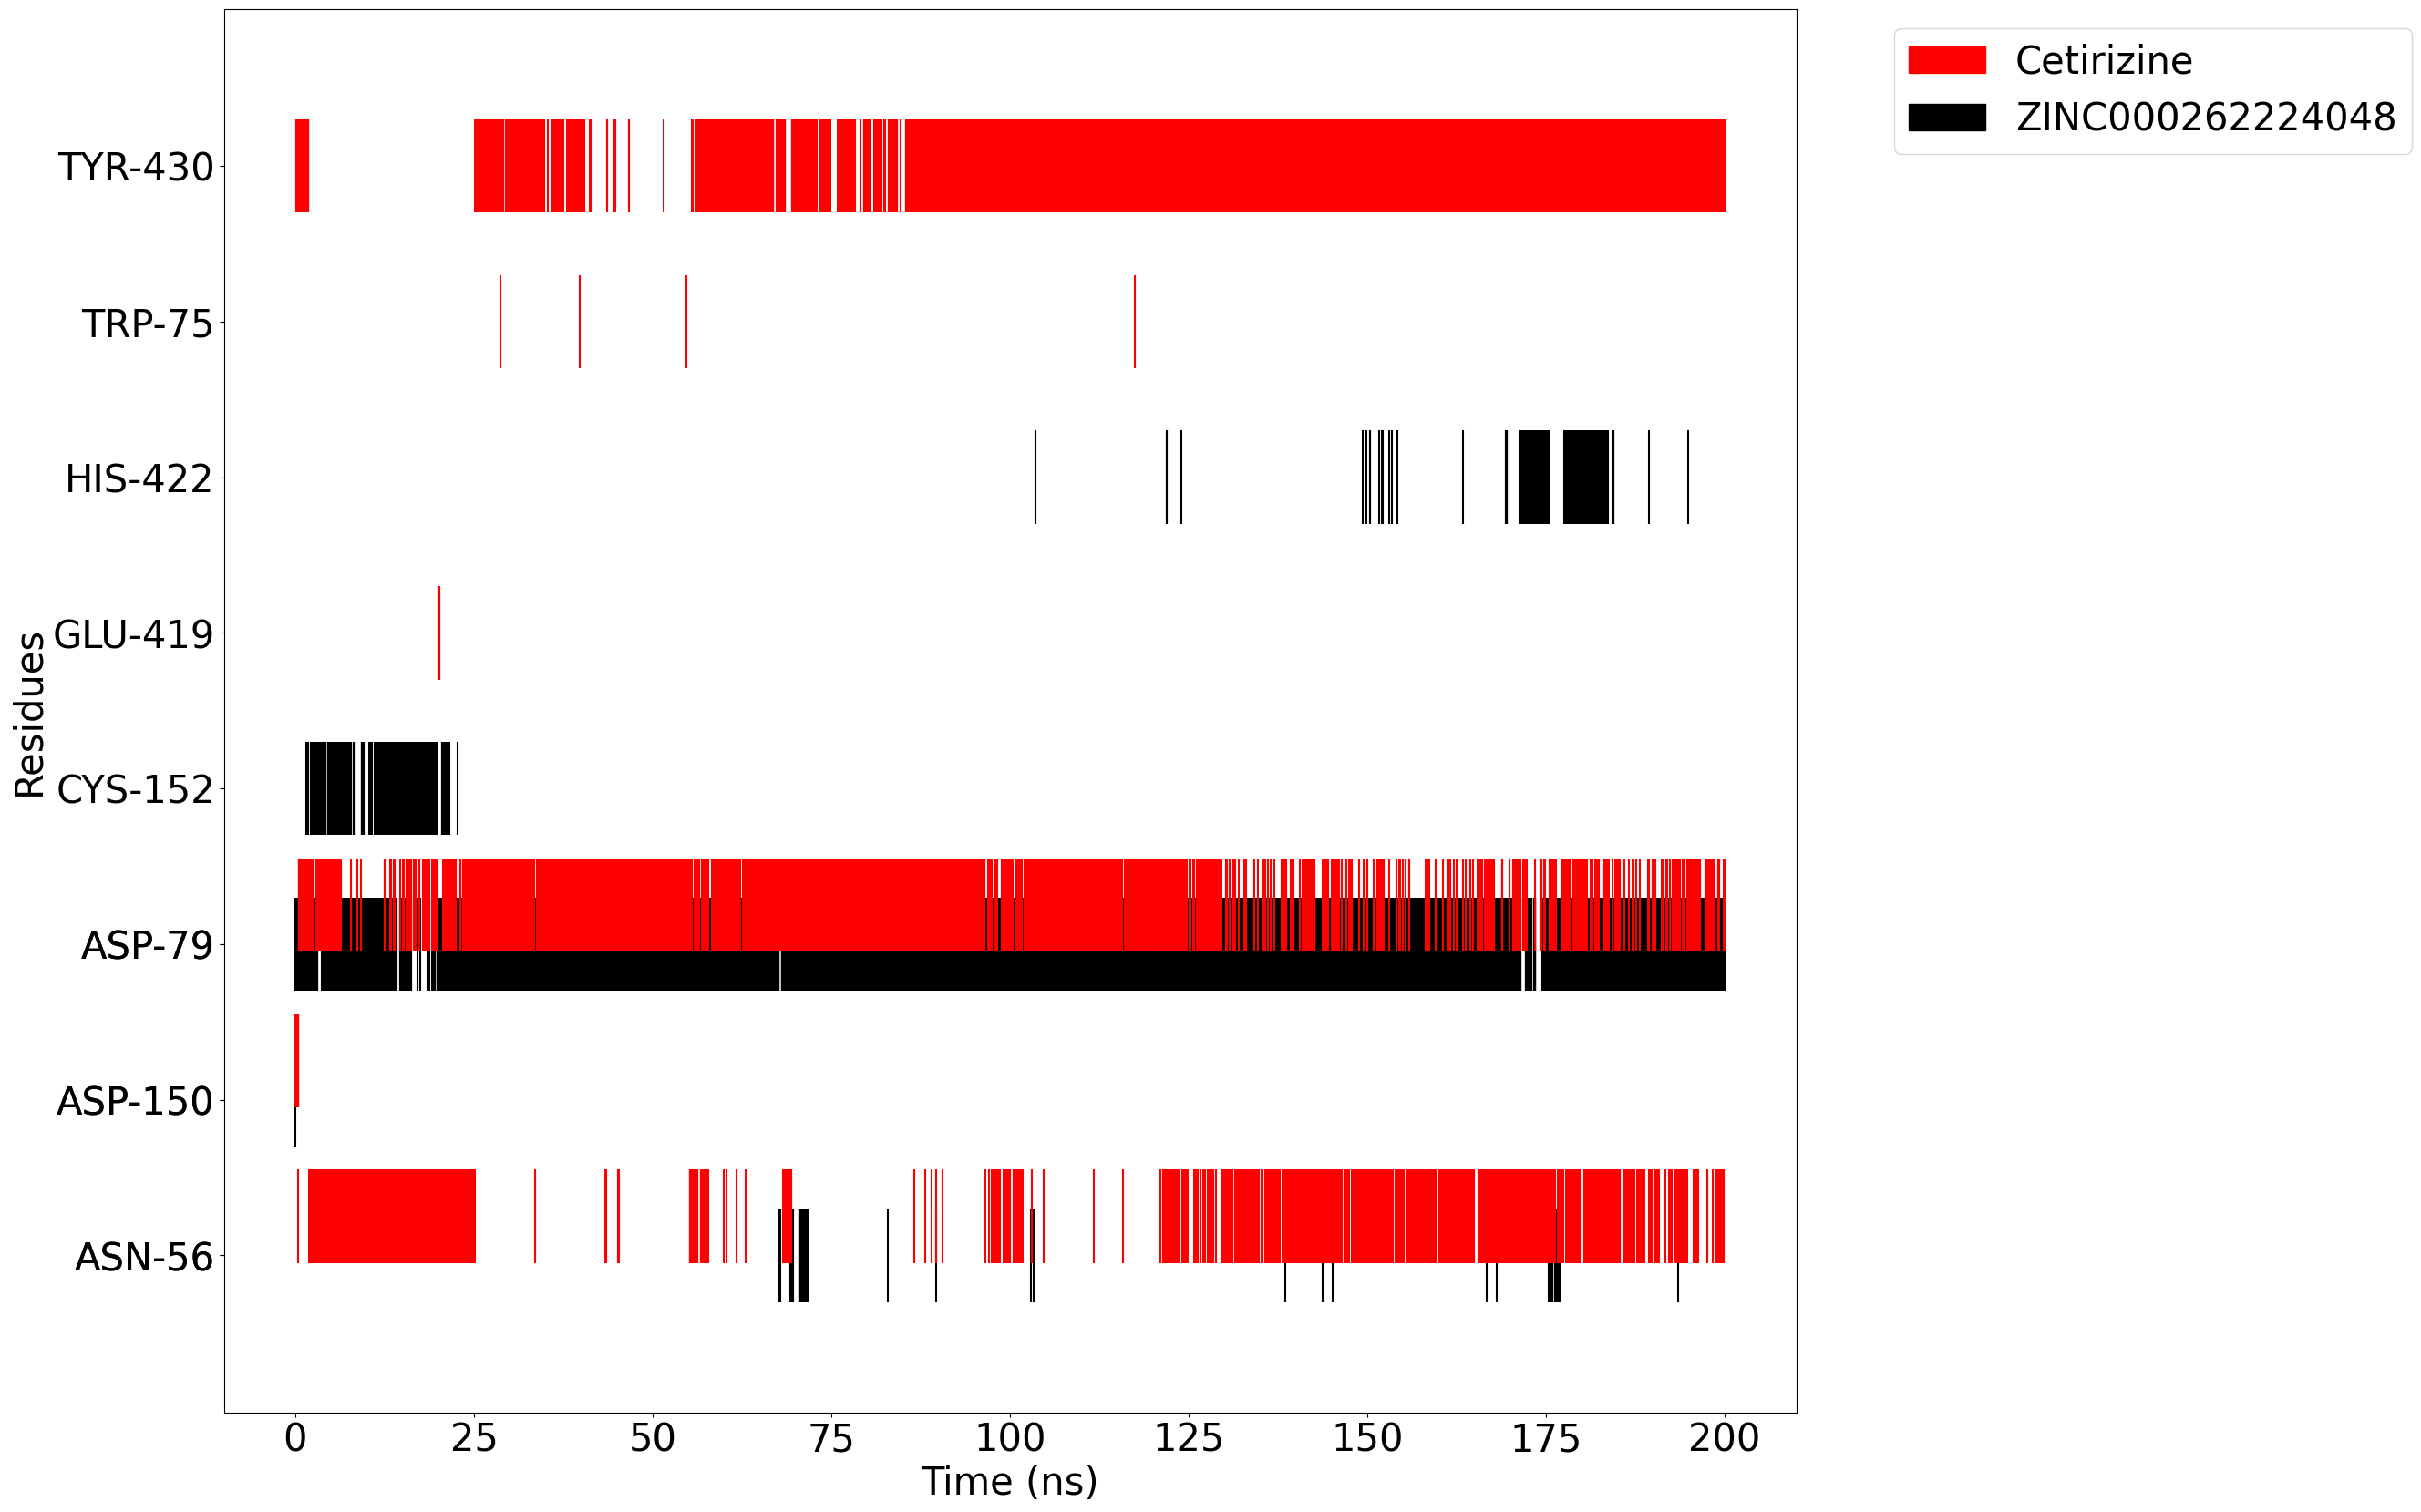

In [3]:


plt.rc('font',family='helvetica')
plt.rcParams.update({'font.size': 30})
plt.figure(figsize=((30,20)))
plt.eventplot(main_df['time'], linelengths=0.6, colors=main_df['color'], lineoffsets=main_df['new_factor'])
plt.yticks(main_df['gene_numerical'], main_df['gene'])
plt.xlabel('Time (ns)')
plt.ylabel('Residues')

legend_patches = [Patch(facecolor='red', label='Cetirizine',edgecolor='red'), Patch(facecolor='black', label='ZINC000262224048',edgecolor='black')]

Patch(facecolor='red', label='Cetirizine',edgecolor='red'), Patch(facecolor='black', label='ZINC000262224048',edgecolor='black')

plt.legend(handles=legend_patches,bbox_to_anchor=(1.05,1), loc='upper left')
plt.subplots_adjust(right=0.7)
plt.savefig('D:/Abel/Nitte_colab/Cetirizine/Hbond_test1.png', dpi=300)
plt.show()

